# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Carla Kim Gaieski </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [31]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [32]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [33]:
df['Hemisfério'] = np.where(df.Latitude>0,'Norte','Sul')

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

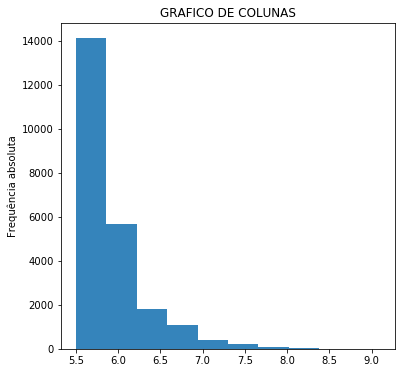

In [34]:
plot = df.Magnitude.plot.hist(title='GRAFICO DE COLUNAS', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [35]:
a = expon.fit(df.Magnitude)
a

(5.4999999996710809, 0.38254864885090978)

O loc indica o valor da média da exponencial e o scale é o desvio padrão da exponencial. Assim, como a taxa de variação é negativa, há uma taxa de decaimento no gráfico, o desvio padrão não é muito elevado, visto que a maioria dos dados se concentram em 5,5. 

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

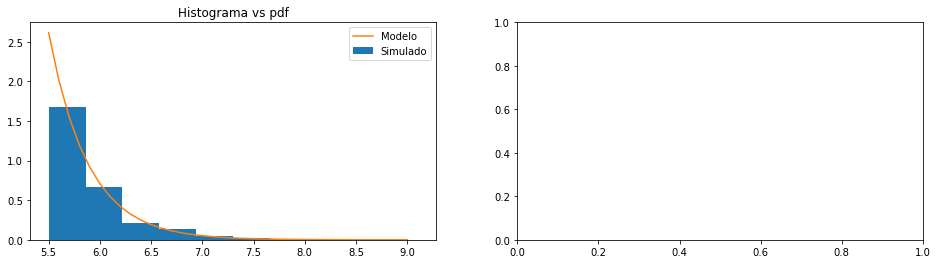

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(df.Magnitude, normed = True)
x = np.arange(df.Magnitude.min(), df.Magnitude.max(), 0.1)
ax[0].plot(x, expon.pdf(x,5.4999999996710809 ,  0.38254864885090978))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

Aqui está sendo analisado uma Poisson, que torna possivel fazer previsões para o futuro, que segue a reta 'modelo', a partir de informações já fornceidas, pelo simulado. Assim, percebe-se o decaimento, que aparente tender a zero, num futuro tempo.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [92]:
ct = pd.crosstab(df.Hemisfério, df.Type, normalize=True).T
ct

Hemisfério,Norte,Sul
Type,,
Earthquake,0.447121,0.545191
Explosion,0.000085,0.000085
Nuclear Explosion,0.006279,0.001196
Rock Burst,0.000000,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [46]:
ct.sum()

Hemisfério
Norte    0.453485
Sul      0.546515
dtype: float64

Explique o seu raciocínio

O conceito de terremoto foi concebido como todos os abalos sismicos existentes, ou seja, engloba todas as atividades terrestres da tabela acima. Assim, a propabilidade seria a soma da chance desses fatos, que já ocorreram, sobre a probabilidade total dos fatos ocorrem, que equivale a 1. Assim, seeria somente a soma da primeira coluna "Norte".

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [59]:
ct2 = pd.crosstab(df.Hemisfério, df.Type, normalize=False).T
ct2.sum()

p = 147/10617
print(str(p*100)+"%")

1.3845719129697656%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

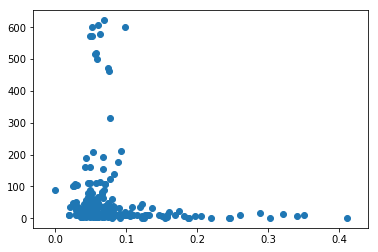

In [60]:
plt.scatter(df['Magnitude Error'],df['Depth'])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [63]:
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

As informações aqui correlacionadas variam de -1 a 1, na verdade. No entanto, como em qualquer outra análise bivariada, há um fator importante quando se está proximo ao zero. No caso, quanto mais proximo de zero mais nao correlato as informações são.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

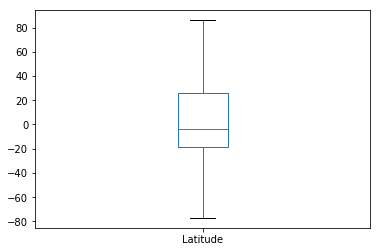

In [69]:
df['Latitude'].plot(kind ='box')

In [93]:
df['Latitude'].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

A mediana está proxima do primeiro quartil. Assim, há uma assimetria da distribuição. Com isso, 50% dos incidentes ocorrem na latitude -3,5, que se aproxima da linha da mediana.

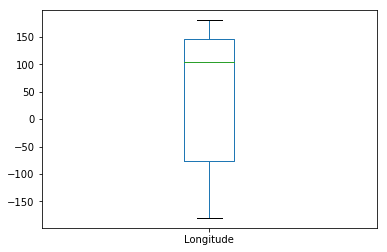

In [70]:
df['Longitude'].plot(kind ='box')

In [94]:
df['Longitude'].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

Neste caso, também há uma districuição assimétrica. O segundo quartil indica que os incidententes ocorrem com maior frequência na longitude 103,98.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [95]:
k = df[df['Magnitude Type'] == 'MB']
t = k[k.Type == 'Nuclear Explosion']

p = (t.Hemisfério.value_counts(sort=False,normalize=True)*100).round(decimals=2)
p

Norte    82.82
Sul      17.18
Name: Hemisfério, dtype: float64

É mais provável que tenha sido no Norte, pois possui 82% de chance que uma explosão nuclear de magnitude MB ocorra lá. Já no sul, a probabilidade permanece em 17%.